# Repaso 3

## Enunciado

Crea un programa para estudiar el impacto ambiental del COVID-19 en Madrid. Para ello utiliza los siguientes datos:

- Listado de las estaciones de control: [enlace](https://datos.madrid.es/egob/catalogo/212629-1-estaciones-control-aire.csv)
- Datos 2020: [enlace](https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip)
- Datos 2019: [enlace](https://datos.madrid.es/egob/catalogo/201200-42-calidad-aire-horario.zip)
- Interpretación de los datos: [enlace](https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf)

1. Para ello, crea una gráfico normal donde comparar ambas muestras en función del día del mes.
2. Además, crea un gráfico con dos mapas de calor (uno para 2019 y otro para 2020) dónde se pueda comprobar el nivel de contaminación en función del día de la semana y la hora del día, tomando como referencia el máximo valor observado. Es de esperar que el mapa de 2019 sea mucho más *caliente* que el de 2020.

## Aclaraciones
1. Tomaremos como referencia la estación **Escuelas Aguirre** situada entre la calle **Alcalá** y la calle **O'Donell**
2. Evaluaremos los datos del mes de Marzo tomando como referencia las muestras de **NO2** observadas. Para realizar el gráfico normal, tomaremos los valores observados a las **09:00** en particular.
3. Las dimensiones de los mapas de calor han de ser 24x7. El valor a pintar en el mapa, será el máximo observado. Es decir, si tenemos 4 mediciones un Lunes a las 13:00 cuyos valores son [52, 37, 108, 40] nos quedaremos con el 108.
4. Puedes (y debes) descargar los datos manualmente haciendo clic en los enlaces, ya que son ficheros zip que hay que descomprimir. Para cada mes, hay 3 tipos de fichero distinto (txt, csv y xml). Utiliza el que te resulte más cómodo.

Es un ejercicio "complejo". Recordad que el foro esta abierto para lanzar preguntas y ayudaros unos a otros.

## Solución

### Marzo 2019 vs. Marzo 2020

In [1]:
from datetime import datetime

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
m2019 = open('../Datos/mar_mo19.csv', 'r').read().splitlines()
m2020 = open('../Datos/mar_mo20.csv', 'r').read().splitlines()

In [4]:
m2019_datos = m2019[1:]
m2020_datos = m2020[1:]

In [5]:
headers = m2019[0].split(";")

In [6]:
for i, h in enumerate(headers):
    print(i, h)

0 PROVINCIA
1 MUNICIPIO
2 ESTACION
3 MAGNITUD
4 PUNTO_MUESTREO
5 ANO
6 MES
7 DIA
8 H01
9 V01
10 H02
11 V02
12 H03
13 V03
14 H04
15 V04
16 H05
17 V05
18 H06
19 V06
20 H07
21 V07
22 H08
23 V08
24 H09
25 V09
26 H10
27 V10
28 H11
29 V11
30 H12
31 V12
32 H13
33 V13
34 H14
35 V14
36 H15
37 V15
38 H16
39 V16
40 H17
41 V17
42 H18
43 V18
44 H19
45 V19
46 H20
47 V20
48 H21
49 V21
50 H22
51 V22
52 H23
53 V23
54 H24
55 V24


In [7]:
values_index = [i for i, header in enumerate(headers) if header.startswith("H")]

In [8]:
def format_reg(reg):
    splitted_reg = reg.split(";")
    date = datetime.strptime('/'.join(splitted_reg[5:8]), '%Y/%m/%d')
    data = {
        'valores': [float(splitted_reg[n]) for n in values_index],
        'fecha': date,
        'dia_semana': date.weekday(),
        'magnitud': int(splitted_reg[3]),
        'estacion': int(splitted_reg[2]),
    }
    return data

In [9]:
formatted_2019 = map(format_reg, m2019_datos)
formatted_2020 = map(format_reg, m2020_datos)

In [10]:
def filter_reg(reg):
    return (reg.get("magnitud") == 8) and (reg.get("estacion") == 8)

In [11]:
filtered_2019 = list(filter(filter_reg, formatted_2019))
filtered_2020 = list(filter(filter_reg, formatted_2020))

In [12]:
am9_2019 = [x.get('valores')[8] for x in filtered_2019]
am9_2020 = [x.get('valores')[8] for x in filtered_2020]
x_2019 = [x.get('fecha').day for x in filtered_2019]
x_2020 = [x.get('fecha').day for x in filtered_2020]

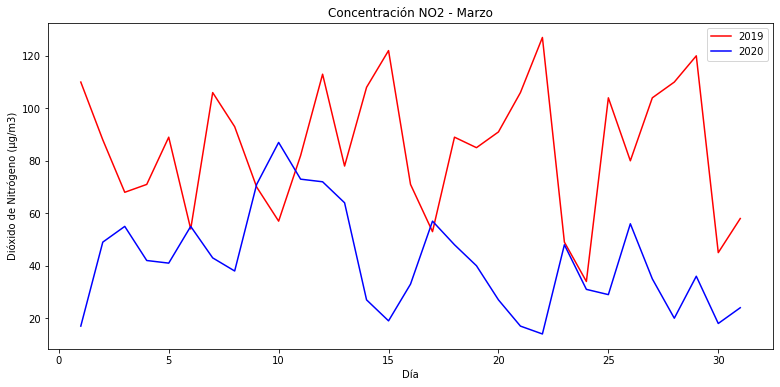

In [13]:
plt.figure(figsize=(13, 6)) 
plt.title("Concentración NO2 - Marzo")
plt.plot(x_2019, am9_2019, color='red', label='2019')
plt.plot(x_2020, am9_2020, color='blue', label='2020')
plt.legend() # con esto añadimos la leyenda con los valores de label
plt.ylabel("Dióxido de Nitrógeno (µg/m3)") # y así añadimos etiquetas a los ejes
plt.xlabel("Día") # y así añadimos etiquetas a los ejes
plt.show()

### Contaminación en función del día de la semana y la hora

In [14]:
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [15]:
heat_032019 = [[0 for _ in range(len(dias_semana))] for _ in range(24)]
heat_032020 = [[0 for _ in range(len(dias_semana))] for _ in range(24)]

In [16]:
def fill_values(regs, values):
    for reg in regs:
        day = reg.get("dia_semana")
        for hour, value in enumerate(reg.get('valores')):
            values[hour][day] = max(values[hour][day], value)

In [17]:
_ = fill_values(filtered_2019, heat_032019)
_ = fill_values(filtered_2020, heat_032020)

In [18]:
min_2019 = min([min(x) for x in heat_032019])
min_2020 = min([min(x) for x in heat_032020])
max_2019 = max([max(x) for x in heat_032019])
max_2020 = max([max(x) for x in heat_032020])

In [19]:
# obtenemos el menor y el mayor de los valores para que ambos mapas tengan la misma escala
vmin = min(min_2019, min_2020) 
vmax = max(max_2019, max_2020)

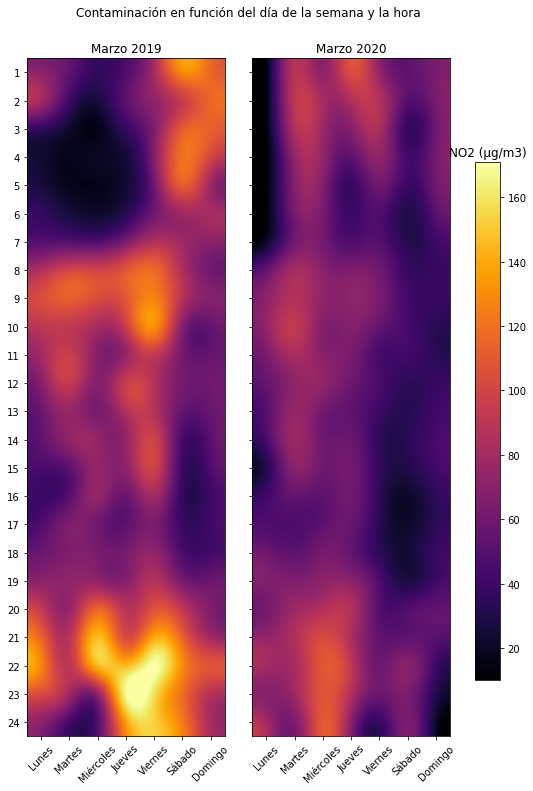

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(7,12), sharey=True)

#2019
ax[0].set_yticks(list(range(25)))
ax[0].set_yticklabels(list(range(1, 25)))
ax[0].set_xticks(range(len(dias_semana)))
ax[0].set_xticklabels(dias_semana, rotation=45)
ax[0].imshow(heat_032019, vmin=vmin, vmax=vmax, interpolation='lanczos', cmap='inferno')
ax[0].figure.tight_layout()
ax[0].set_title("Marzo 2019")

#2020
ax[1].set_yticks(list(range(25)))
ax[1].set_yticklabels(list(range(1, 25)))
ax[1].set_xticks(range(len(dias_semana)))
ax[1].set_xticklabels(dias_semana, rotation=45)
ax[1].figure.tight_layout()
im = ax[1].imshow(heat_032020, vmin=vmin, vmax=vmax, interpolation='lanczos', cmap='inferno')
ax[1].set_title("Marzo 2020")

#color bar
fig.subplots_adjust(right=.9)
cbar_ax = fig.add_axes([0.95, 0.20, 0.05, 0.6])
clb = plt.colorbar(im , cax=cbar_ax)
clb.ax.set_title("NO2 (µg/m3)")

plt.suptitle("Contaminación en función del día de la semana y la hora")
plt.show()

### Bonus: Contaminación en función del día del mes y la hora.

In [21]:
daily_heat_032019 = [[0 for _ in range(24)] for _ in range(31)]
daily_heat_032020 = [[0 for _ in range(24)] for _ in range(31)]

In [22]:
def fill_daily_values(regs, values):
    for reg in regs:
        day = reg.get("fecha").day
        for hour, value in enumerate(reg.get('valores')):
            values[day-1][hour] = value

In [23]:
_ = fill_daily_values(filtered_2019, daily_heat_032019)
_ = fill_daily_values(filtered_2020, daily_heat_032020)

In [24]:
daily_min_2019 = min([min(x) for x in daily_heat_032019]) # minimo de 2019
daily_min_2020 = min([min(x) for x in daily_heat_032020]) # minimo de 2020
daily_max_2019 = max([max(x) for x in daily_heat_032019]) # maximo de 2019
daily_max_2020 = max([max(x) for x in daily_heat_032020]) # maximo de 2020

In [25]:
vmin = min(daily_min_2019, daily_min_2020)
vmax = max(daily_max_2019, daily_max_2020)

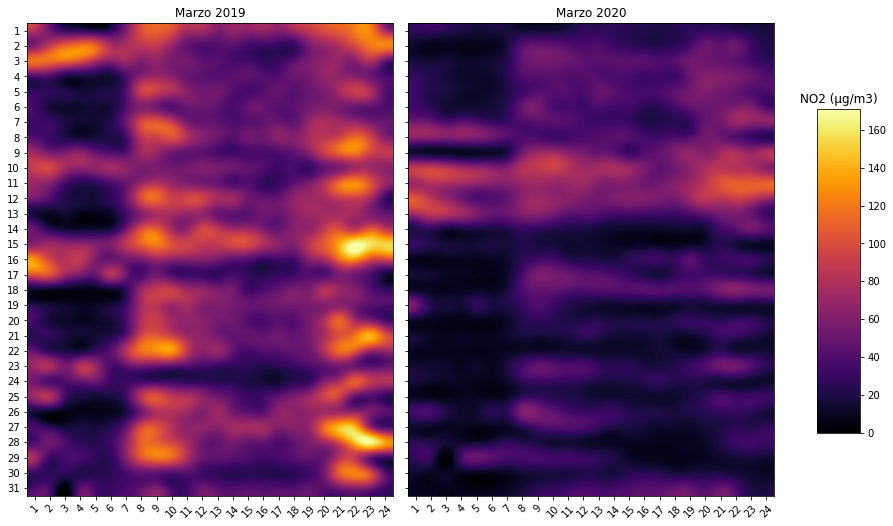

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 15), sharey=True)

#2019
ax[0].set_yticks(list(range(31)))
ax[0].set_yticklabels(list(range(1, 32)))
ax[0].set_xticks(range(24))
ax[0].set_xticklabels(list(range(1, 25)), rotation=45)
ax[0].imshow(daily_heat_032019, vmin=vmin, vmax=vmax, interpolation='lanczos', cmap='inferno')
ax[0].figure.tight_layout()
ax[0].set_title("Marzo 2019")


#2020
ax[1].set_yticks(list(range(31)))
ax[1].set_yticklabels(list(range(1, 32)))
ax[1].set_xticks(range(24))
ax[1].set_xticklabels(list(range(1, 25)), rotation=45)
ax[1].figure.tight_layout()
im = ax[1].imshow(daily_heat_032020, vmin=vmin, vmax=vmax, interpolation='lanczos', cmap='inferno')
ax[1].set_title("Marzo 2020")

#color bar
fig.subplots_adjust(right=.9)
cbar_ax = fig.add_axes([0.95, 0.35, 0.05, 0.30])
clb = plt.colorbar(im , cax=cbar_ax)
clb.ax.set_title("NO2 (µg/m3)")

plt.show()